# Описание датасета

**Предметная область**: Обзор рынка недвижимости США

**Источник данных**: [Kaggle: USA House Prices](https://www.kaggle.com/datasets/fratzcan/usa-house-prices)

**Характер данных**: Реальные 

**Атрибуты**:
- `Date` (строковый): Дата продажи недвижимости. Этот атрибут помогает понять
временные тенденции цен на недвижимость.

- `Price` (числовой): Цена продажи недвижимости в долларах США. Это целевая переменная, к которой мы стремимся
предсказывать.

- `Bedrooms` (числовой): Количество спален в доме. Как правило, недвижимость с
Чем больше спален, тем выше цена.

- `Bathrooms` (числовой): Количество ванных комнат в доме. Подобно спальням,
Больше ванных комнат может увеличить стоимость недвижимости.

- `Sqft Living` (числовой): Размер жилой площади в квадратных футах. Большие жилые площади
обычно связаны с более высокой стоимостью недвижимости.

- `Sqft Lot` (числовой): Размер участка в квадратных футах. Большие участки могут повысить
привлекательность и стоимость объекта недвижимости.

- `Floors` (числовой): Количество этажей в доме. Многоквартирные дома могут
быть более жилыми и привлекательными.

- `Waterfront` (числовой): Бинарный индикатор (1, если недвижимость имеет вид на набережную, 0 -
в противном случае). Недвижимость с видом на набережную часто оценивается выше.

- `View` (числовой): Индекс от 0 до 4, указывающий на качество обзора объекта. Лучшие
виды, скорее всего, повышают стоимость объекта.

- `Condition` (числовой): Состояние недвижимости оценивается по индексу от 1 до 5. Недвижимость
в лучшем состоянии, как правило, стоит дороже.

- `Sqft Above` (числовой): Площадь помещения над цокольным этажом. 
Может помочь в оценке ценности надземного пространства.

- `Sqft Basement` (числовой): Площадь подвала. Подвалы могут быть более значимыми в зависимости от их удобства использования.

- `Yr Built` (числовой): Год постройки объекта недвижимости. Старые объекты недвижимости могут представлять историческую
ценность, в то время как новые могут предлагать современные удобства.

- `Yr Renovated` (числовой): Год последней реконструкции недвижимости. Недавний ремонт может
повысить привлекательность и стоимость объекта недвижимости.

- `Street` (строковый): Уличный адрес объекта недвижимости. Этот атрибут можно использовать для анализа
ценовых тенденций в зависимости от местоположения.

- `City` (строковый): город, в котором находится объект недвижимости. В разных городах динамика рынка различна.

- `Statezip` (строковый): штат и почтовый индекс объекта недвижимости. Этот атрибут обеспечивает региональный контекст для объекта недвижимости.

- `Country` (строковый): Страна, в которой находится объект недвижимости. Однако в данном наборе данных основное внимание
уделяется объектам недвижимости в США. Атрибут введён для полноты.
...

**Задача анализа**:
Рассмотреть рынок недвижимости в США, так как он имеет большое значение как для местных, так и для международных инвесторов.

`1.` Импортируем необходимые библиотеки:
- `Pandas` - библиотека для анализа и манипуляции данными.
- `Matplotlib` - библиотека для визуализации данных в Python.
- `Seaborn` - библиотека для визуализации данных, основанная на Matplotlib, но с более высокоуровневыми интерфейсами.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

`2.` Загрузим рассматриваемый датасет:

In [2]:
df = pd.read_csv('USA_Housing_Dataset.csv')

Для каждого атрибута определим:
- `Среднее значение`
- `Среднеквадратичное отклонение`
- `Количество пропущенных значений`
- `Определим есть ли выбросы `
- `Построим гистограмму распределения значений`

`3.` Реализуем функцию для поиска выбросов. Рассчитаем нижнюю и верхнюю границу. Таким образом, если значение выходит за рамки границ, то оно считается выбросом:

In [3]:
def finding_outliers(col):
    q1 = df[col].quantile(0.25)                     # Значение, ниже которого находится 25% данных
    q3 = df[col].quantile(0.75)                     # Значение, ниже которого находится 75% данных
    iqr = q3 - q1                                   # Показатель того, насколько широко распределены средние 50% данных

    lower_bound = q1 - 1.5 * iqr                    # Нижняя граница
    upper_bound = q3 + 1.5 * iqr                    # Верхняя граница

    # Таким образом, значения ниже нижней границы или выше верхней границы считаются выбросами
    # Строки с такими значениями (выбросами) заносим в новый dataframe
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Количество выбросов: {outliers.shape[0]}')

`4.` Реализуем функцию для поиска пропущенных значений. Если значение пропущено, то заменяем его средним значением

In [4]:
def finding_missing_values(col):
    # Проверка пропущенных значений
    missing_values = df[col].isnull().sum()
    print(f'Пропущенные значения: {missing_values}')
    
    # Вариант обработки пропущенных значений
    # Если значение пропущено, то заменяем его средним значением
    if missing_values > 0:
        df[col].fillna(df[col].mean(), inplace=True)

`5.` Реализуем функцию для отрисовки гистограммы распределения для того или иного атрибута с помощью библиотек seaborn и matplotlib

In [5]:
def draw_histogram(col):
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Гистограмма распределения для атрибута "{col}"')
    plt.show()

`6.` Реализуем функцию для определения корреляции между параметрами и того:
- Какие атрибуты высококоррелированы (будем считать порог высокой корреляции - 0.5), определить характер корреляции 
- Какие атрибуты не имеют корреляцию

In [6]:
def determine_correlation(df, threshold=0.5):
    # Оставляем только числовые столбцы
    numeric_df = df.select_dtypes(include=['number'])

    # Рассчитываем корреляционную матрицу
    correlation = numeric_df.corr(method='pearson')
    
    # Находим атрибуты с высокой корреляцией
    high_corr = correlation[correlation.abs() > threshold]
    
    # Находим атрибуты с низкой корреляцией
    low_corr = correlation[(correlation.abs() < threshold) & (correlation.abs() > 0)]

    # Находим атрибуты не имеют корреляцию
    no_corr = correlation[(correlation.abs() == 0)]
    
    # Выводим результаты
    print(f'\n\nВысококоррелированные атрибуты:\n {high_corr}')
    print(f'\n\nАтрибуты с низкой корреляцией:\n {low_corr}')
    print(f'\n\nАтрибуты без корреляции:\n {no_corr}')

    # Определяем, сколько столбцов будем выводить в одной матрице
    n_cols = 3;
    columns = correlation.columns.tolist()

    # Определяем количество групп
    for i in range(0, len(columns), n_cols):
        # Берем подгруппу столбцов
        subgroup = numeric_df[columns[i:i + n_cols]]
        
        # Строим матрицу графиков разброса
        pd.plotting.scatter_matrix(subgroup)
        
        # Названия графика
        plt.suptitle(f'Матрица графиков разброса: столбцы {i + 1} по {min(i + n_cols, len(columns))}')
        plt.show()

`7.` И наконец, циклом переберём все столбцы с числовым типом данных:



Атрибут: price
Среднее значение: 553062.8772890784
Средневадратическое отклонение: 583686.4522446232
Количество выбросов: 215
Пропущенные значения: 0


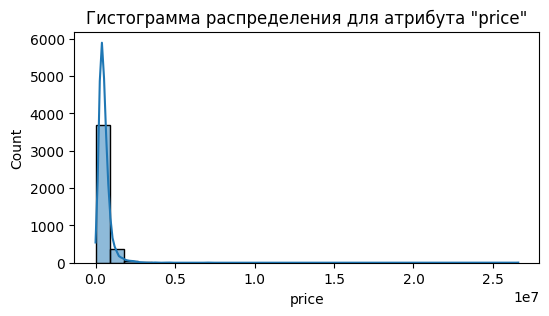



Атрибут: bedrooms
Среднее значение: 3.40048309178744
Средневадратическое отклонение: 0.9039387963928567
Количество выбросов: 108
Пропущенные значения: 0


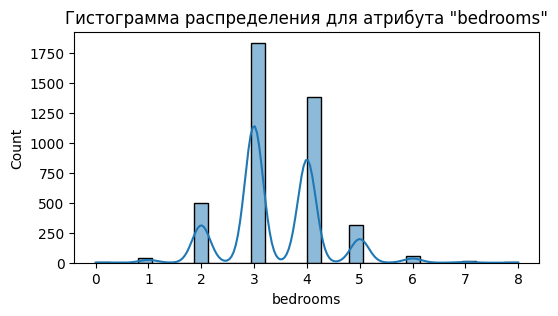



Атрибут: bathrooms
Среднее значение: 2.1630434782608696
Средневадратическое отклонение: 0.7847330168593607
Количество выбросов: 128
Пропущенные значения: 0


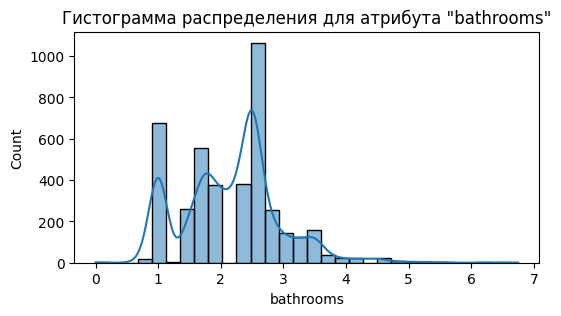



Атрибут: sqft_living
Среднее значение: 2143.6388888888887
Средневадратическое отклонение: 957.4816210435149
Количество выбросов: 123
Пропущенные значения: 0


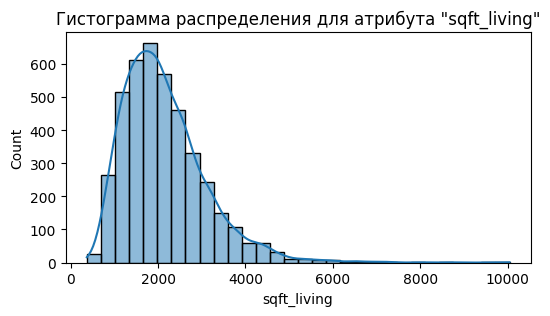



Атрибут: sqft_lot
Среднее значение: 14697.638164251208
Средневадратическое отклонение: 35876.838123004505
Количество выбросов: 480
Пропущенные значения: 0


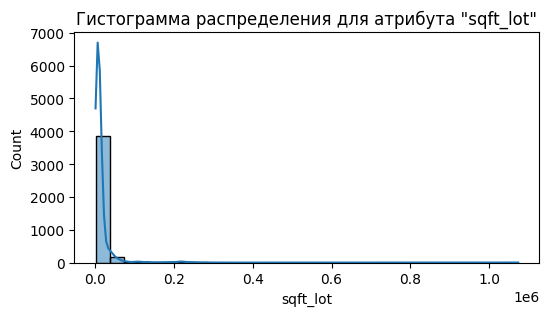



Атрибут: floors
Среднее значение: 1.5141304347826088
Средневадратическое отклонение: 0.5349408589117802
Количество выбросов: 0
Пропущенные значения: 0


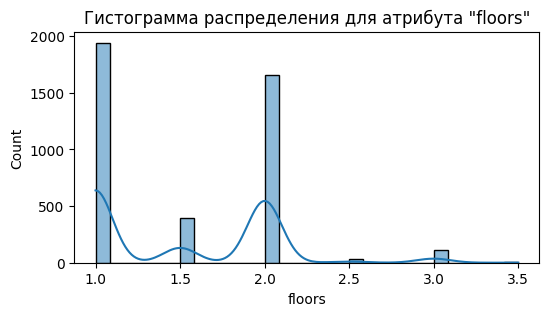



Атрибут: waterfront
Среднее значение: 0.00748792270531401
Средневадратическое отклонение: 0.08621861334035545
Количество выбросов: 31
Пропущенные значения: 0


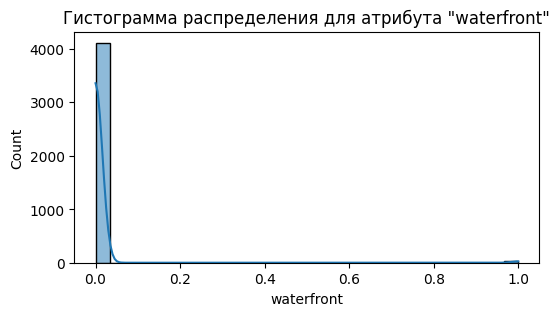



Атрибут: view
Среднее значение: 0.2466183574879227
Средневадратическое отклонение: 0.7906194807400345
Количество выбросов: 418
Пропущенные значения: 0


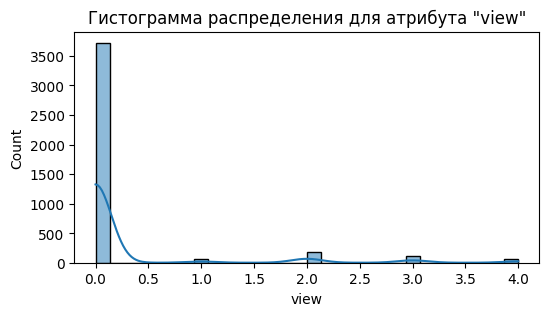



Атрибут: condition
Среднее значение: 3.4524154589371983
Средневадратическое отклонение: 0.6785332028867993
Количество выбросов: 5
Пропущенные значения: 0


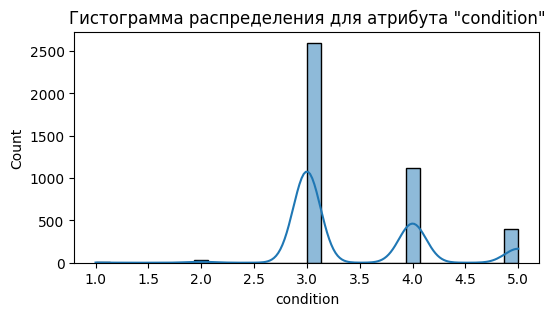



Атрибут: sqft_above
Среднее значение: 1831.3514492753623
Средневадратическое отклонение: 861.3829469017647
Количество выбросов: 104
Пропущенные значения: 0


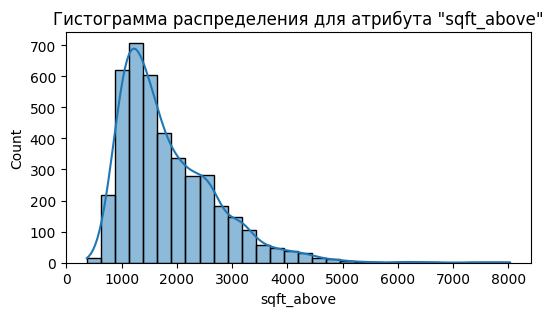



Атрибут: sqft_basement
Среднее значение: 312.28743961352654
Средневадратическое отклонение: 464.3492215480429
Количество выбросов: 82
Пропущенные значения: 0


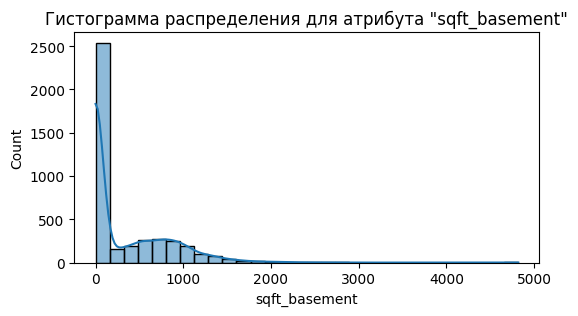



Атрибут: yr_built
Среднее значение: 1970.8140096618358
Средневадратическое отклонение: 29.80794118486726
Количество выбросов: 0
Пропущенные значения: 0


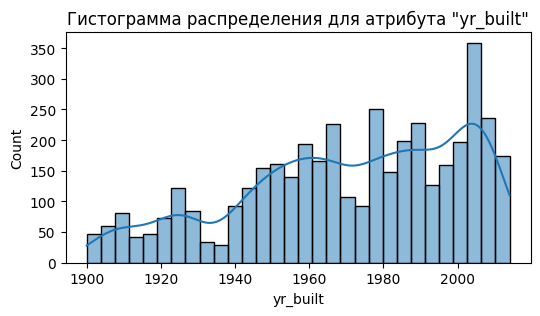



Атрибут: yr_renovated
Среднее значение: 808.3683574879227
Средневадратическое отклонение: 979.3805354455802
Количество выбросов: 0
Пропущенные значения: 0


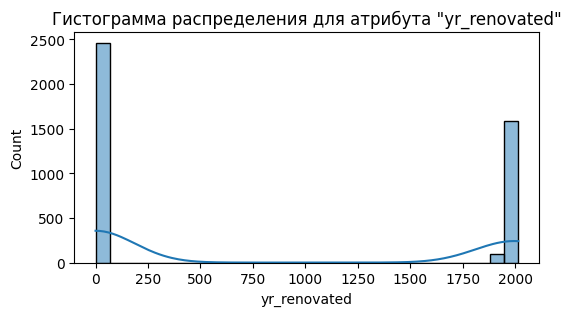



Высококоррелированные атрибуты:
                price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price            1.0       NaN        NaN          NaN       NaN       NaN   
bedrooms         NaN  1.000000   0.542549     0.590110       NaN       NaN   
bathrooms        NaN  0.542549   1.000000     0.760353       NaN       NaN   
sqft_living      NaN  0.590110   0.760353     1.000000       NaN       NaN   
sqft_lot         NaN       NaN        NaN          NaN       1.0       NaN   
floors           NaN       NaN        NaN          NaN       NaN  1.000000   
waterfront       NaN       NaN        NaN          NaN       NaN       NaN   
view             NaN       NaN        NaN          NaN       NaN       NaN   
condition        NaN       NaN        NaN          NaN       NaN       NaN   
sqft_above       NaN       NaN   0.687679     0.874881       NaN  0.524777   
sqft_basement    NaN       NaN        NaN          NaN       NaN       NaN   
yr_built         NaN       Na

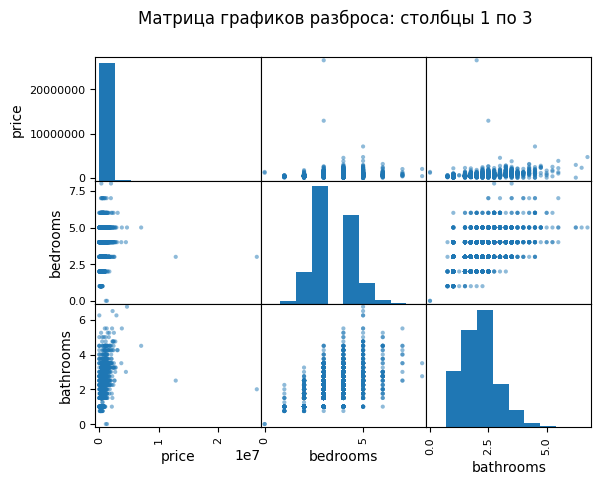

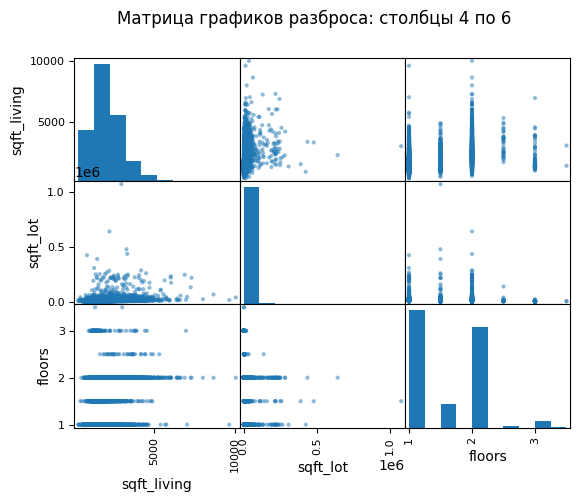

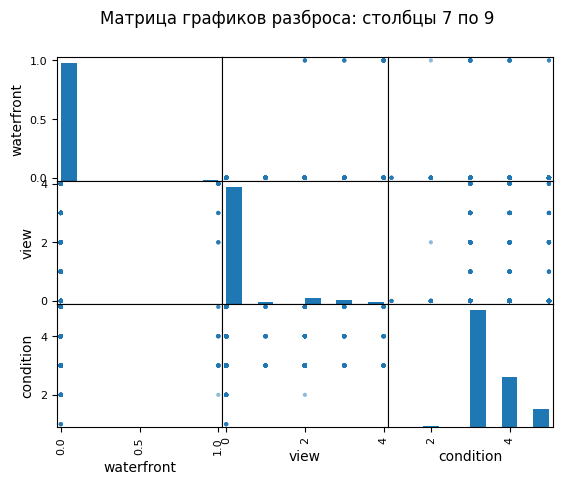

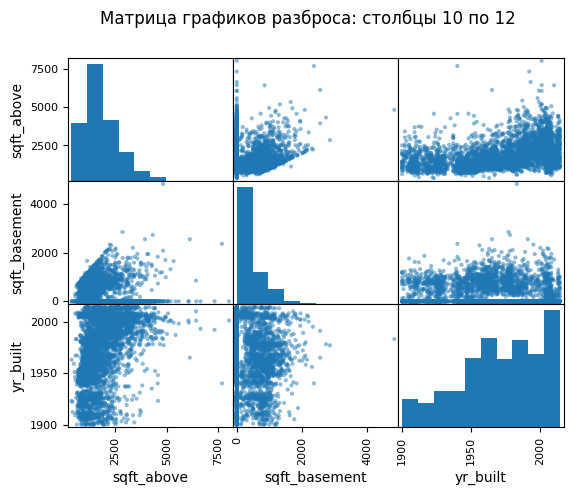

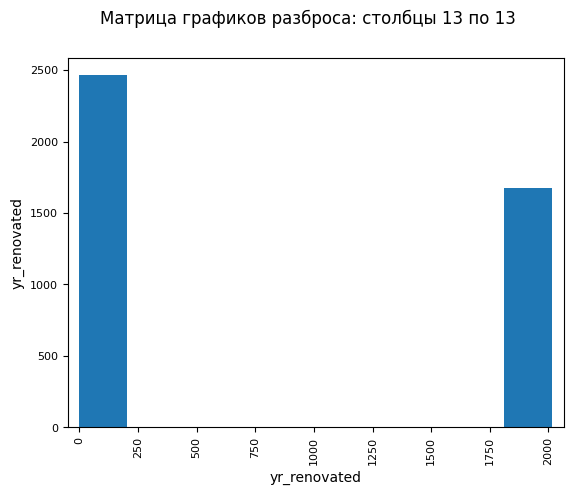

In [7]:
# Выборка всех столбцов с числовым типом данных
cols = df.select_dtypes(include=['number']).columns

for col in cols:
    print(f'\n\nАтрибут: {col}')
    print(f'Среднее значение: {df[col].mean()}')
    print(f'Средневадратическое отклонение: {df[col].std()}')
    
    # Поиск выбросов
    finding_outliers(col)
    
    # Поиск пропущенных значений
    finding_missing_values(col)

    # Построение гистограммы
    draw_histogram(col)

# Определение корреляции
determine_correlation(df)

`8.` Проанализируем полученные результаты:

Можно проанализировать много разных связей (например, bedrooms и sqft_living: больше спален - больше площадь), но рассмотрим **ключевой** атрибут **(цена(price))** и связь остальных атрибутов с ним. Исходя из результатов (коэффициенты корреляции), можно сделать вывод о том, что цена дома так или иначе зависит от каждого рассматриваемого атрибута.

Так, сильное влияние на цену оказывает: 
1. Количество ванных комнат (bathrooms)
2. Размер жилой площади (sqft living)
3. Размер участка (sqft lot)
4. Площадь помещения над цокольным этажом (sqft above)
5. Площадь подвала (sqft basement).

Важно отметить, что цена дома стремительно падает, если последняя реконструкция дома была слишком давно (что, в принципе, и логично). Остальные атрибуты тоже влияют на цену, но не столь сильно. 